In [18]:
#import simpleconvolution_port_analysis.csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sarchl



# Read in the data
df = pd.read_csv('im2col_port.csv')


In [4]:
# Find "RDMA" in df['port_type'] and collect them in a list
rdma_ports = df[df['Where'].str.contains('RDMA')]

In [5]:
#set a dataframe called rdma_port_incomming
rdma_ports = rdma_ports.sort_values(by=['Where'])
del rdma_ports['End']
del rdma_ports['What']

In [6]:
rdma_port_msg = pd.DataFrame(columns=['Start', 'Where', 'Value', 'Unit'])
rdma_port_Byte = pd.DataFrame(columns=['Start', 'Where', 'Value', 'Unit'])

for index, row in rdma_ports.iterrows():
    if row['Unit'] == 'Msg' and 'ToOutside' in row['Where']:
        rdma_port_msg.loc[len(rdma_port_msg)] = row
    if row['Unit'] == 'Byte' and 'ToOutside' in row['Where']:
        rdma_port_Byte.loc[len(rdma_port_Byte)] = row

<Axes: xlabel='Start', ylabel='Where'>

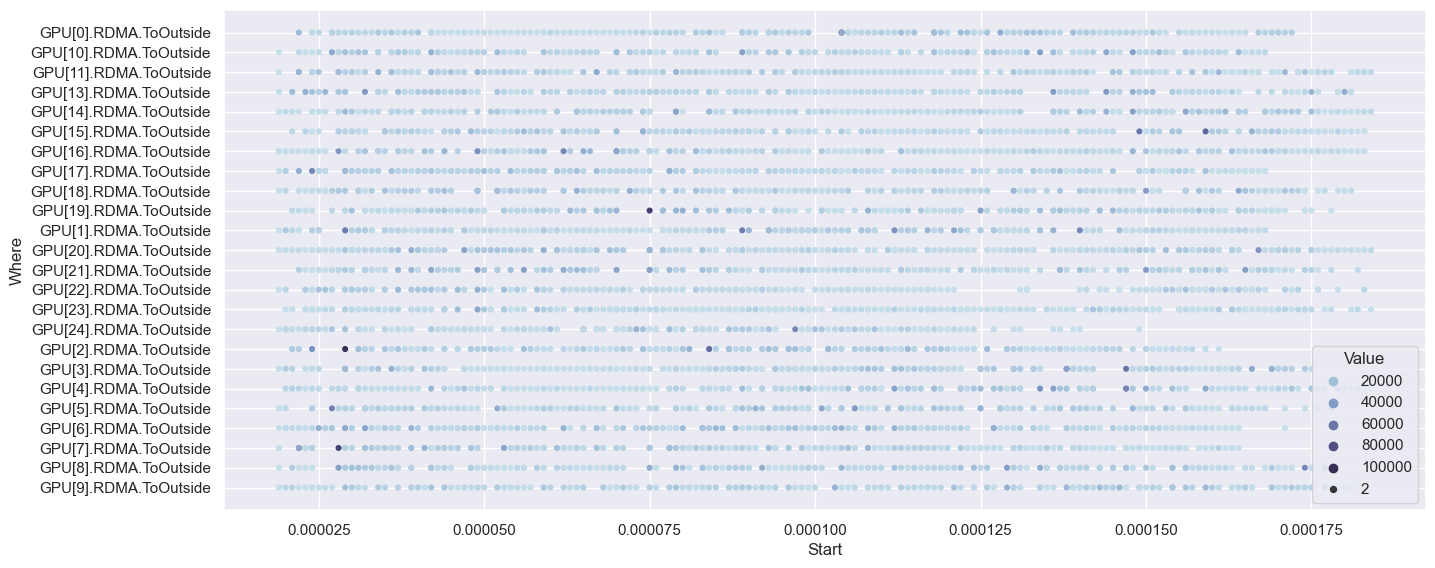

In [23]:
f, ax = plt.subplots(figsize=(15.5, 6.5))
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)
sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)
sns.scatterplot(x='Start', 
                y='Where', 
                hue='Value',
                palette="ch:s=.25,rot=-.25",
                # hue_order=clarity_ranking,
                # sizes=(1, 8),
                linewidth=0,
                size = 2,
                data=rdma_port_Byte, ax=ax)

In [8]:
rdma_port_Byte = rdma_port_Byte.sort_values(by='Where')

In [9]:
del rdma_port_Byte['Unit']